<a href="https://colab.research.google.com/github/Mega-737/Challenge-Alura-Store-Data-Science/blob/main/AluraStoreBr_challange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [ ]:
import pandas as pd

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


---




Calcular o *Faturamento Total de Cada LOJA*. Somando os valores da coluna Preço de cada loja para estimar o faturamento.

###1.1.*Faturamento Total por Loja – Gráfico de Barras*

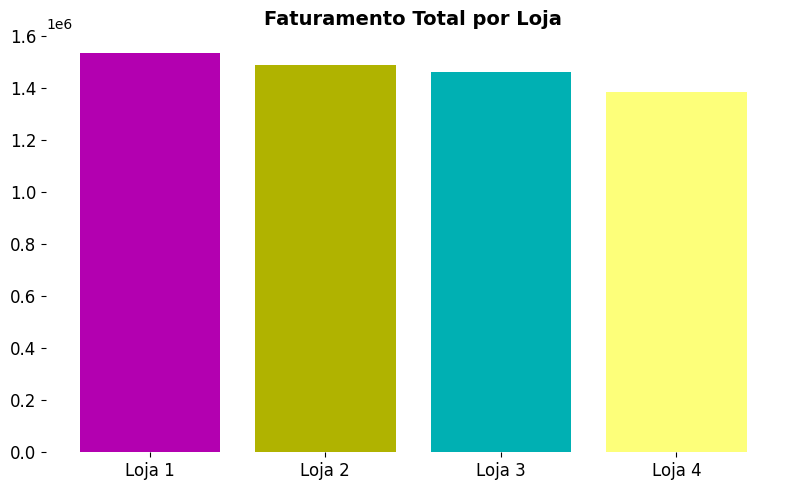


Faturamento Total por Loja (em Reais):


,Preço
Loja,
Loja 1,"R$ 1.534.509,12"
Loja 2,"R$ 1.488.459,06"
Loja 3,"R$ 1.464.025,03"
Loja 4,"R$ 1.384.497,58"


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Combina os dados dos quatro dataframes em um único dataframe para facilitar o processamento
# Adiciona uma coluna 'Loja' para identificar a origem dos dados
# Garante que os dataframes estejam definidos - isso pressupõe que a célula de carregamento de dados já foi executada
try:
    loja1['Loja'] = 'Loja 1'
    loja2['Loja'] = 'Loja 2'
    loja3['Loja'] = 'Loja 3'
    loja4['Loja'] = 'Loja 4'

    dados_combinados = pd.concat([loja1, loja2, loja3, loja4], ignore_index=True)

    # Corrigir o índice para iniciar em 1 (optional, based on original code)
    dados_combinados.index = range(1, len(dados_combinados) + 1)

    # Cores padronizadas por loja
    cores_lojas = {
        'Loja 1': '#B300B0',
        'Loja 2': '#B0B300',
        'Loja 3': '#00B0B3',
        'Loja 4': '#FDFF7A'
    }

    # Faturamento total por loja
    faturamento_total = dados_combinados.groupby('Loja')['Preço'].sum().sort_index()

    # Gráfico de barras
    plt.figure(figsize=(8, 5))
    plt.bar(faturamento_total.index, faturamento_total.values, color=[cores_lojas[loja] for loja in faturamento_total.index])
    plt.title('Faturamento Total por Loja', fontsize=14, weight='bold')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.box(False)
    plt.grid(False)
    plt.tight_layout()
    plt.show()

    # Mostrar os valores em reais
    faturamento_total_reais = faturamento_total.apply(lambda x: f'R$ {x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'))
    print("\nFaturamento Total por Loja (em Reais):")
    display(faturamento_total_reais)

except NameError:
    print("Error: The dataframes (loja1, loja2, loja3, loja4) are not defined.")
    print("Please run the cell that loads the data from the CSV files first.")
except FileNotFoundError:
    print("Error: The file '/content/AluraStoreBr.xlsx' was not found.")
    print("This code has been updated to use the dataframes loaded from the CSV files.")

### 1.2.*Participação no Faturamento – Gráfico de Pizza*

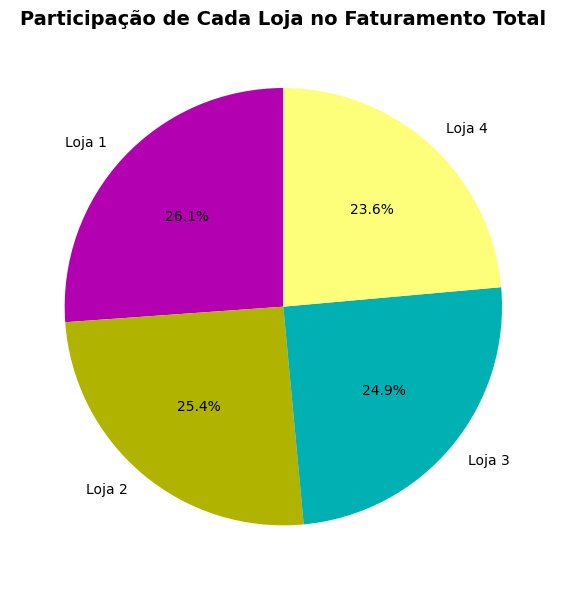

,Preço
Loja,
Loja 1,26.13
Loja 2,25.35
Loja 3,24.93
Loja 4,23.58


In [ ]:
# Cálculo percentual de faturamento
percentual_faturamento = (faturamento_total / faturamento_total.sum()) * 100

# Gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(
    percentual_faturamento,
    labels=percentual_faturamento.index,
    colors=[cores_lojas[loja] for loja in percentual_faturamento.index],
    autopct='%.1f%%',
    startangle=90
)
plt.title('Participação de Cada Loja no Faturamento Total', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

# Mostrar percentuais com duas casas decimais
percentual_faturamento.round(2)

# 2. Vendas por Categoria


---




Calcular a Quantidade de Produtos vendidos por *Categoria em cada LOJA*. A ideia é agrupar os dados por categoria e contar o número de vendas de cada tipo, mostrando as categoria mais populares de cada loja.

### 2.1.*Quantidade de produtos vendidos por categoria em cada Loja*

/tmp/ipython-input-90-203128663.py:17: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/tmp/ipython-input-90-203128663.py:18: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/tmp/ipython-input-90-203128663.py:17: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/tmp/ipython-input-90-203128663.py:18: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/tmp/ipython-input-90-203128663.py:17: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/tmp/ipython-input-90-203128663.py:18: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a F

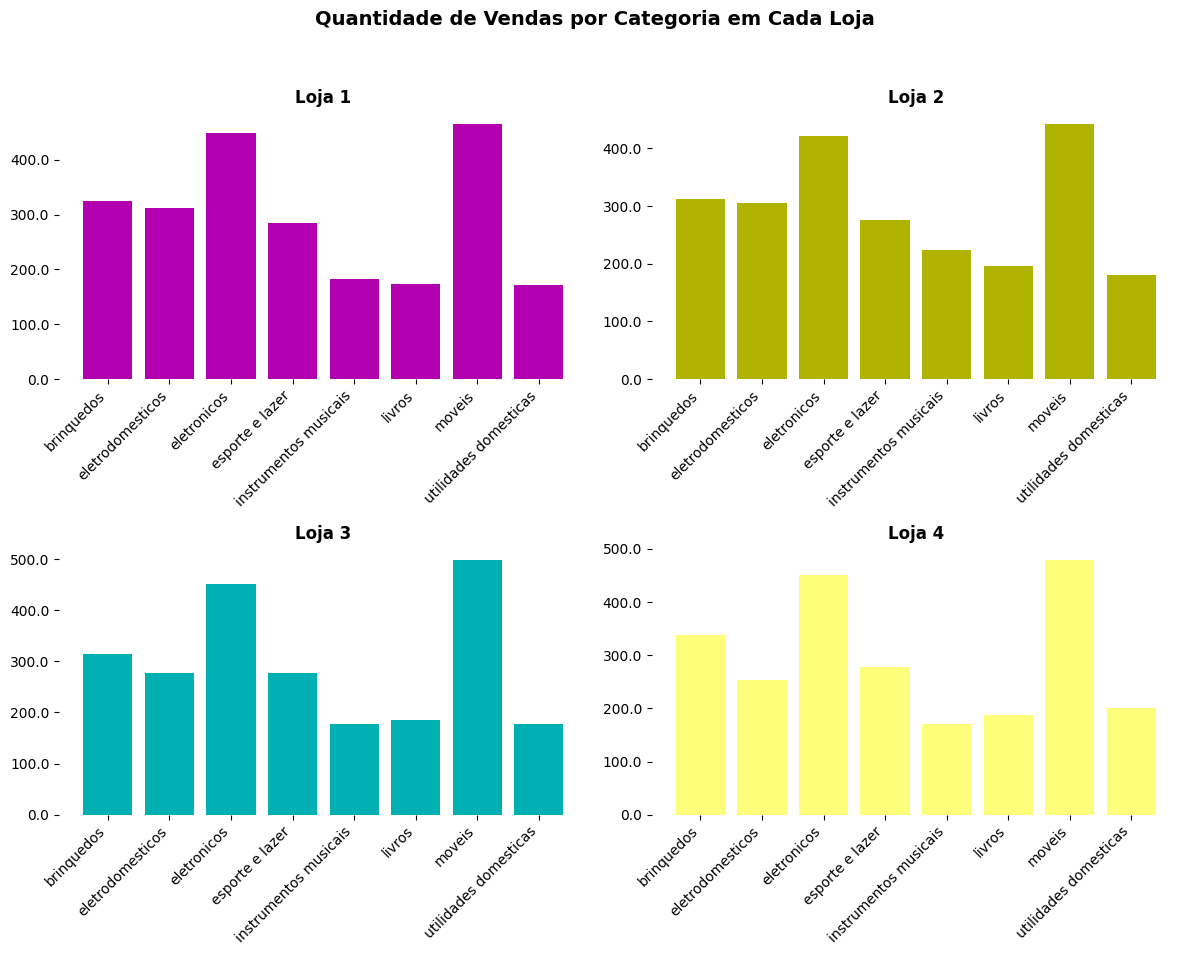

In [ ]:
# Agrupar por Loja e Categoria e contar as vendas
vendas_categoria = dados_combinados.groupby(['Loja', 'Categoria do Produto'])['Produto'].count().reset_index()
vendas_categoria.rename(columns={'Produto': 'Quantidade'}, inplace=True)

# Gráfico de barras por loja (um gráfico para cada loja)
fig, axs = plt.subplots(2, 2, figsize=(12, 10))  # 2x2 com 1cm (~0.4 inch) de distância
fig.subplots_adjust(wspace=0.4, hspace=0.4)

lojas = vendas_categoria['Loja'].unique()
positions = [(0, 0), (0, 1), (1, 0), (1, 1)]

for i, loja in enumerate(lojas):
    ax = axs[positions[i]]
    dados_loja = vendas_categoria[vendas_categoria['Loja'] == loja]
    ax.bar(dados_loja['Categoria do Produto'], dados_loja['Quantidade'], color=cores_lojas[loja])
    ax.set_title(loja, fontsize=12, weight='bold')
    ax.set_xticklabels(dados_loja['Categoria do Produto'], rotation=45, ha='right', fontsize=10)
    ax.set_yticklabels(ax.get_yticks(), fontsize=10)
    ax.grid(False)
    ax.set_frame_on(False)

plt.suptitle('Quantidade de Vendas por Categoria em Cada Loja', fontsize=14, weight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # espaço para o título geral
plt.show()

### 2.2.*Top 3 e Bottom 3 Produtos por Categoria em Cada Loja – Gráfico de Barras Agrupadas*

/tmp/ipython-input-91-2918060938.py:48: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/tmp/ipython-input-91-2918060938.py:49: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/tmp/ipython-input-91-2918060938.py:48: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/tmp/ipython-input-91-2918060938.py:49: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/tmp/ipython-input-91-2918060938.py:48: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/tmp/ipython-input-91-2918060938.py:49: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or usi

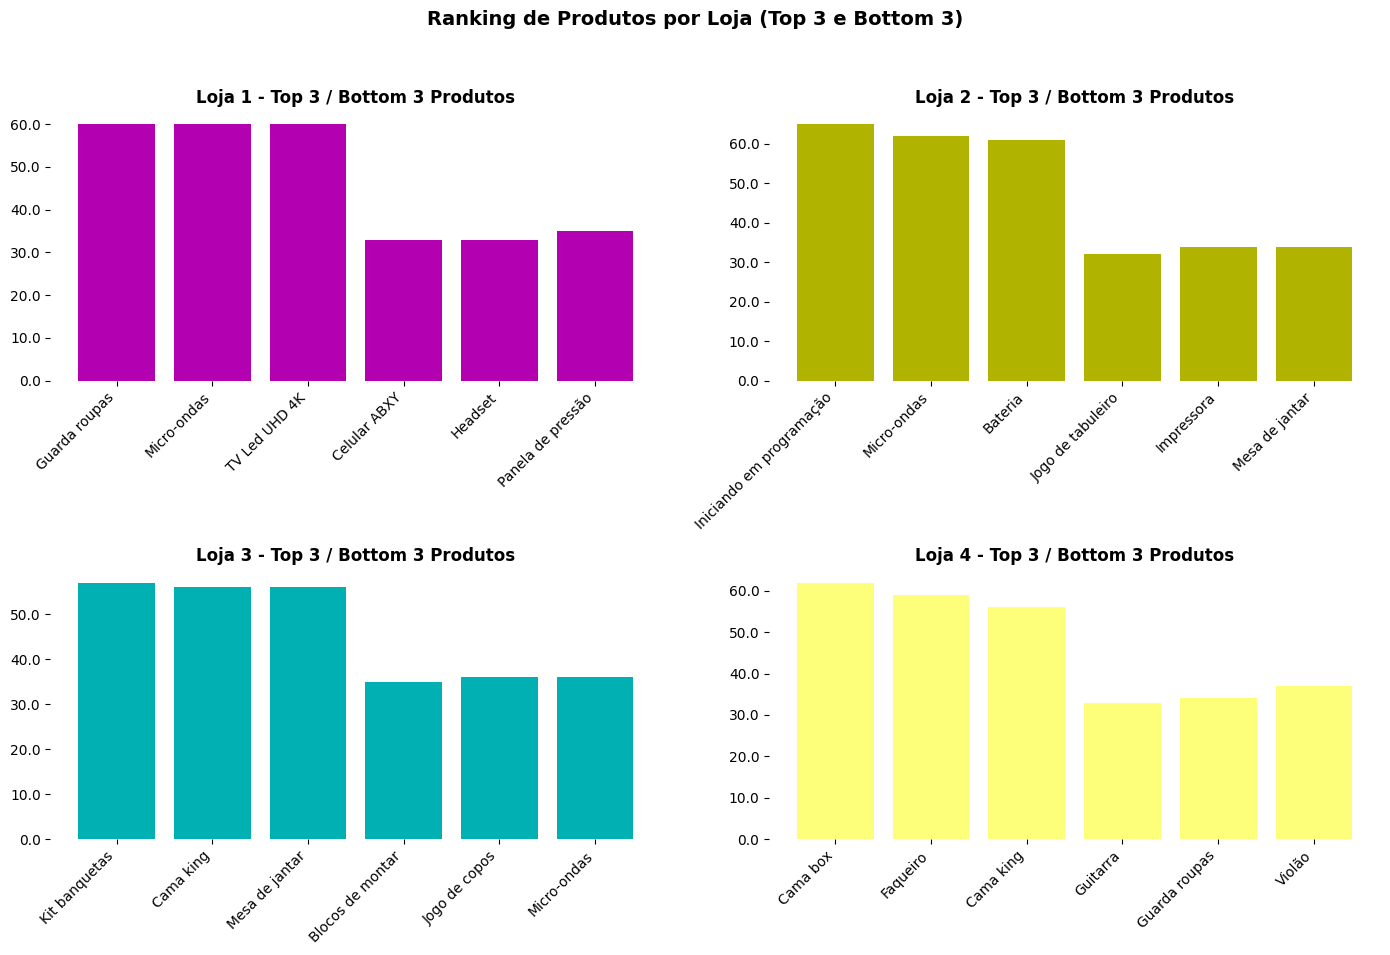

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Certifique-se de que dados_combinados e cores_lojas estão definidos (pressupondo que a célula E1zslYutsFY6 foi executada)
# Caso contrário, talvez seja necessário executar primeiro a célula que cria dados_combinados.

# Agrupamento por loja e produto
vendas_produto = dados_combinados.groupby(['Loja', 'Produto'])['Produto'].count().rename('Quantidade').reset_index()

# Criar um dicionário para armazenar os rankings
ranking_lojas = {}

# Obter a lista única de lojas do DataFrame combinado
lojas = dados_combinados['Loja'].unique()

for loja in lojas:
    df_loja = vendas_produto[vendas_produto['Loja'] == loja]
    top3 = df_loja.nlargest(3, 'Quantidade')
    bottom3 = df_loja.nsmallest(3, 'Quantidade')
    ranking = pd.concat([top3, bottom3])
    ranking_lojas[loja] = ranking

# Gráfico agrupado por loja
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.subplots_adjust(wspace=0.4, hspace=0.4)
positions = [(0, 0), (0, 1), (1, 0), (1, 1)]

# Garantir que a paleta de cores 'cores_lojas' esteja definida (assumindo que a célula E1zslYutsFY6 foi executada)
# Se não estiver definida, definir a paleta de cores manualmente
try:
    cores_lojas = cores_lojas
except NameError:
    cores_lojas = {
        'Loja 1': '#B300B0',
        'Loja 2': '#B0B300',
        'Loja 3': '#00B0B3',
        'Loja 4': '#FDFF7A'
    }


for i, loja in enumerate(lojas):
    ax = axs[positions[i]]
    ranking = ranking_lojas[loja]
    # Use uma cor diferente para os 3 últimos
    colors = [cores_lojas[loja]] * len(ranking) # Use a mesma cor para todas as barras de uma determinada loja
    ax.bar(ranking['Produto'], ranking['Quantidade'], color=colors)
    ax.set_title(f'{loja} - Top 3 / Bottom 3 Produtos', fontsize=12, weight='bold')
    ax.set_xticklabels(ranking['Produto'], rotation=45, ha='right', fontsize=10)
    ax.set_yticklabels(ax.get_yticks(), fontsize=10)
    ax.grid(False)
    ax.set_frame_on(False)

plt.suptitle('Ranking de Produtos por Loja (Top 3 e Bottom 3)', fontsize=14, weight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 3. Média de Avaliação das Lojas


---



Calcular a *média* das avaliações dos Clientes para cada LOJA. O objetivo é entender a *Satisfação dos Clientes com os Produtos Vendidos.*

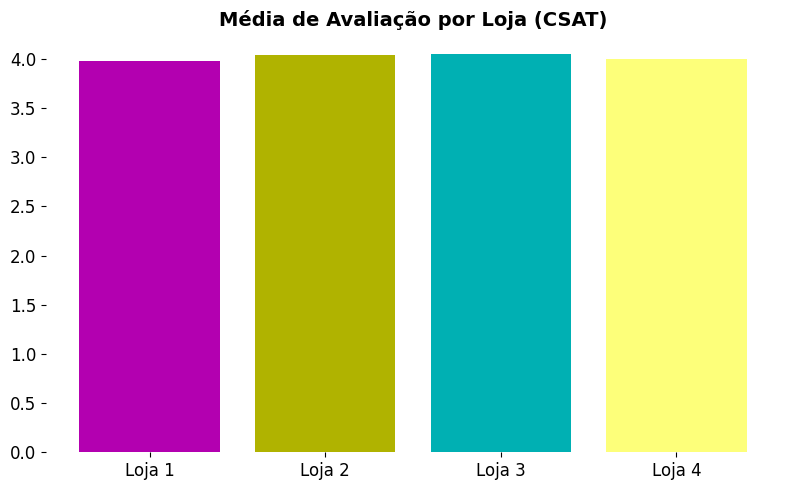

,Avaliação da compra
Loja,
Loja 1,3.98
Loja 2,4.04
Loja 3,4.05
Loja 4,4.00


In [ ]:
# Calcular média das avaliações por loja
avaliacao_media = dados_combinados.groupby('Loja')['Avaliação da compra'].mean().sort_index()

# Gráfico de colunas
plt.figure(figsize=(8, 5))
plt.bar(avaliacao_media.index, avaliacao_media.values, color=[cores_lojas[loja] for loja in avaliacao_media.index])
plt.title('Média de Avaliação por Loja (CSAT)', fontsize=14, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.box(False)
plt.grid(False)
plt.tight_layout()
plt.show()

# Mostrar médias com 2 casas decimais
avaliacao_media.round(2)

# 4. Produtos Mais e Menos Vendidos


---



Identificar quais Produtos foram *os mais vendidos e os menos vendidos* *em cada* *LOJA*.  Ao final, visualize os resultados de forma que fique claro quais produtos se destacaram nas vendas de cada loja.

### *Produtos Mais e Menos Vendidos por Loja*

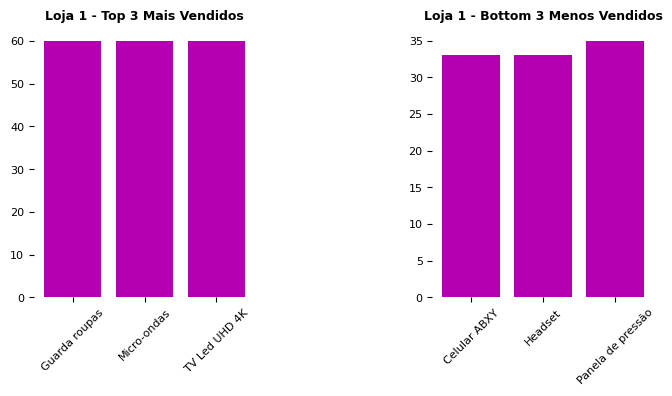

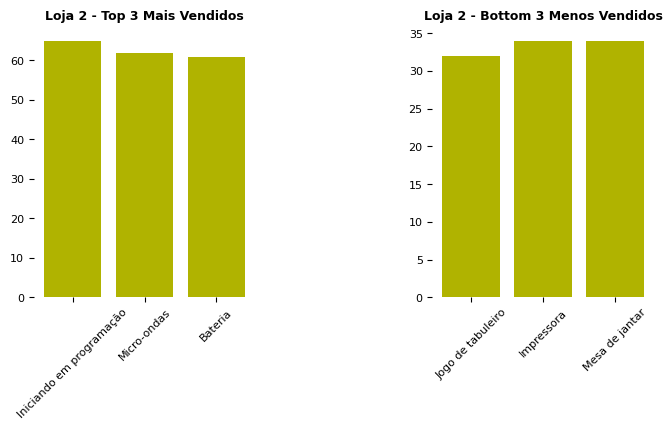

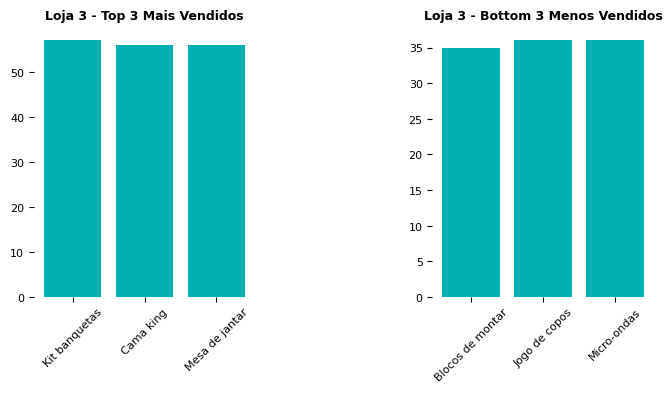

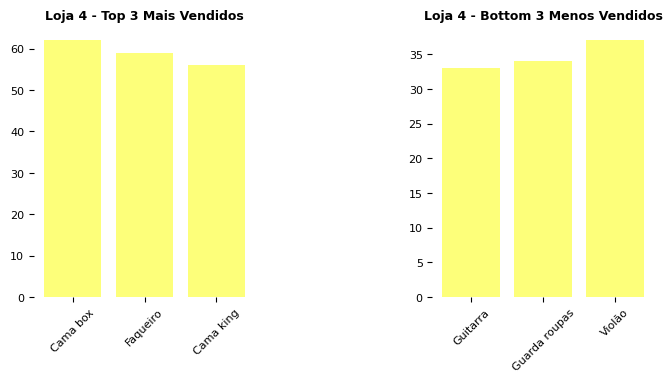

In [ ]:
# Agrupar por Loja e Produto (contar vendas)
vendas_por_produto = dados_combinados.groupby(['Loja', 'Produto'])['Produto'].count().rename('Quantidade').reset_index()

# Lista de lojas
lojas = vendas_por_produto['Loja'].unique()

# Garantir que cores_lojas esteja definida (assumindo que a célula E1zslYutsFY6 foi executada)
# Caso contrário, defina-a aqui ou certifique-se de que a célula anterior foi executada
try:
    cores_lojas = cores_lojas
except NameError:
    cores_lojas = {
        'Loja 1': '#B300B0',
        'Loja 2': '#B0B300',
        'Loja 3': '#00B0B3',
        'Loja 4': '#FDFF7A'
    }

for i, loja in enumerate(lojas):
    df_loja = vendas_por_produto[vendas_por_produto['Loja'] == loja]
    top3 = df_loja.nlargest(3, 'Quantidade')
    bottom3 = df_loja.nsmallest(3, 'Quantidade')

    # Criar figura com espaçamento de 2cm (≈0.8 inch)
    fig, axs = plt.subplots(1, 2, figsize=(8, 3.5))  # largura um pouco maior
    fig.subplots_adjust(wspace=0.8)  # 2cm de espaço horizontal (~0.8 inch)

    # Gráfico Top 3
    axs[0].bar(top3['Produto'], top3['Quantidade'], color=cores_lojas[loja])
    axs[0].set_title(f'{loja} - Top 3 Mais Vendidos', fontsize=9, weight='bold')
    axs[0].tick_params(axis='x', labelrotation=45, labelsize=8)
    axs[0].tick_params(axis='y', labelsize=8)
    axs[0].grid(False)
    axs[0].set_frame_on(False)

    # Gráfico Bottom 3
    axs[1].bar(bottom3['Produto'], bottom3['Quantidade'], color=cores_lojas[loja])
    axs[1].set_title(f'{loja} - Bottom 3 Menos Vendidos', fontsize=9, weight='bold')
    axs[1].tick_params(axis='x', labelrotation=45, labelsize=8)
    axs[1].tick_params(axis='y', labelsize=8)
    axs[1].grid(False)
    axs[1].set_frame_on(False)

    plt.show()

###4.2.*Percentual do Produto Mais Vendido no Faturamento Total*

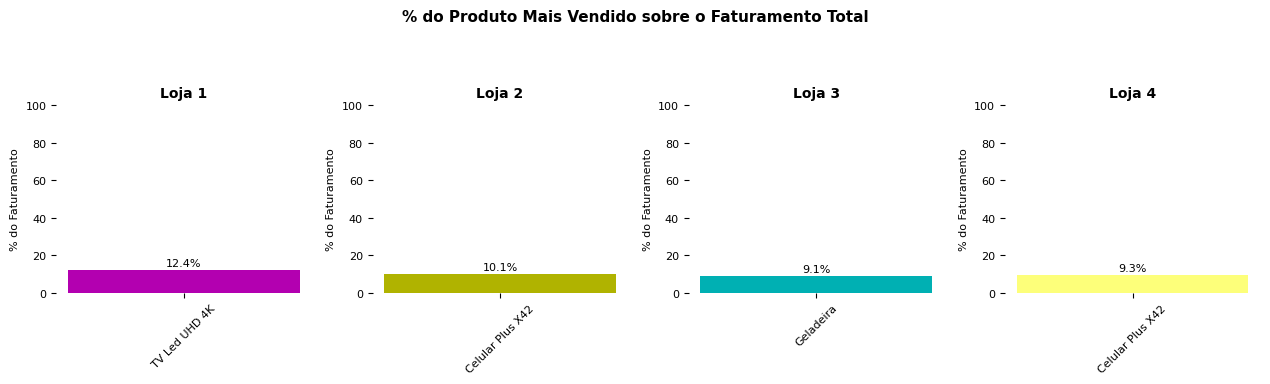

In [ ]:
# Calcular faturamento total por loja
faturamento_total = dados_combinados.groupby('Loja')['Preço'].sum()

# Calcular faturamento por produto e loja
faturamento_produto_loja = dados_combinados.groupby(['Loja', 'Produto'])['Preço'].sum().reset_index()

# Preparar os dados: produto mais vendido por loja
top_produtos = faturamento_produto_loja.sort_values(['Loja', 'Preço'], ascending=[True, False]).groupby('Loja').head(1)

# Calcular o percentual de faturamento do produto mais vendido
top_produtos['Percentual'] = top_produtos.apply(
    lambda row: (row['Preço'] / faturamento_total[row['Loja']]) * 100, axis=1
)

# Criar gráfico lado a lado com 2cm (~0.8 inch) de distância entre gráficos
fig, axs = plt.subplots(1, len(top_produtos), figsize=(len(top_produtos) * 3.2, 4))  # largura proporcional
fig.subplots_adjust(wspace=0.8)  # 2cm = ~0.8 inch

# Garantir que axs seja iterável
if len(top_produtos) == 1:
    axs = [axs]

# Plotar cada gráfico por loja
for i, (idx, row) in enumerate(top_produtos.iterrows()):
    loja = row['Loja']
    produto = row['Produto']
    percentual = row['Percentual']
    cor = cores_lojas[loja]

    axs[i].bar(produto, percentual, color=cor, width=0.6)
    axs[i].text(produto, percentual + 1, f'{percentual:.1f}%', ha='center', va='bottom', fontsize=8)
    axs[i].set_ylim(0, 100)
    axs[i].set_title(f'{loja}', fontsize=10, weight='bold')
    axs[i].tick_params(axis='x', labelrotation=45, labelsize=8)
    axs[i].tick_params(axis='y', labelsize=8)
    axs[i].set_ylabel('% do Faturamento', fontsize=8)
    axs[i].grid(False)
    axs[i].set_frame_on(False)

plt.suptitle('% do Produto Mais Vendido sobre o Faturamento Total', fontsize=11, weight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.90])
plt.show()

# 5. Frete Médio por Loja


---




Calcular o *custo médio de frete para cada LOJA.* O objetivo é entender quanto, em média, está sendo *gasto com frete para cada uma das lojas*.

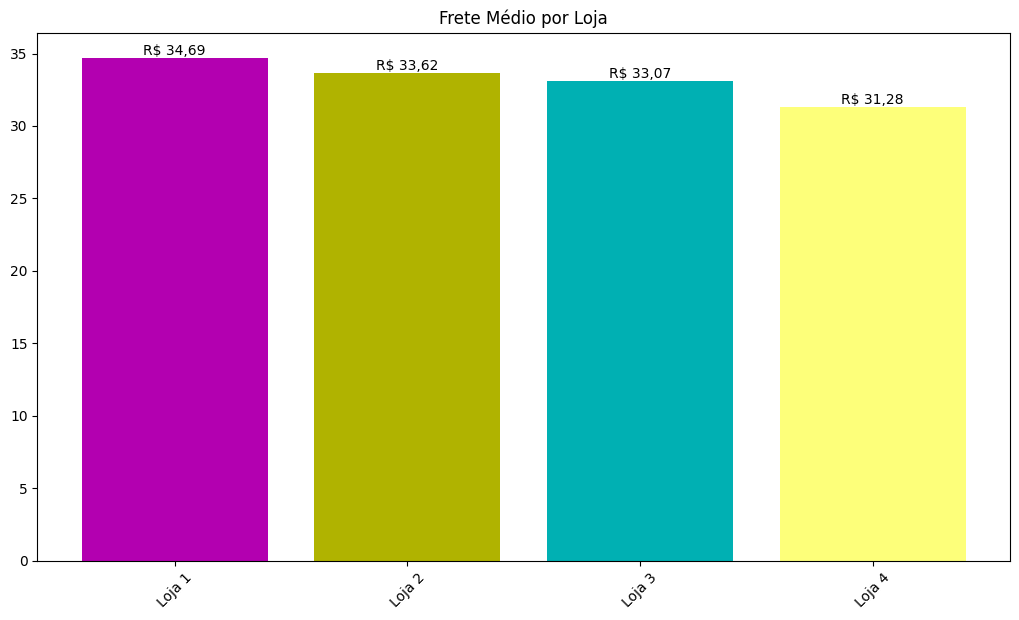


Frete Médio por Loja:


,Loja,Frete
0,Loja 1,"R$ 34,69"
1,Loja 2,"R$ 33,62"
2,Loja 3,"R$ 33,07"
3,Loja 4,"R$ 31,28"


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Configurar a localidade para Brasil para formatação de moeda

# Calculando o frete médio por loja
frete_medio = dados_combinados.groupby('Loja')['Frete'].mean().reset_index()

# Ordenando os dados para uma melhor visualização
frete_medio = frete_medio.sort_values(by='Frete', ascending=False)

# Criando o gráfico de barras
plt.figure(figsize=(10,6))
bars = plt.bar(
    frete_medio['Loja'],
    frete_medio['Frete'],
    color=[cores_lojas[loja] for loja in frete_medio['Loja']]  # Use cores definidas
)

# Removendo títulos dos eixos
plt.xlabel('')
plt.ylabel('')

# Mantendo o título principal
plt.title('Frete Médio por Loja')

# Rotacionando os nomes das lojas para melhor visualização
plt.xticks(rotation=45)

# Adicionando os valores no topo de cada barra, formatted as currency
for bar in bars:
    height = bar.get_height()
    # Use f-string for currency formatting
    valor_formatado = f'R$ {height:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        valor_formatado,
        ha='center',
        va='bottom'
    )

# Removendo as margens ao redor do gráfico
plt.tight_layout(pad=0)

# Exibindo o gráfico
plt.show()

# Exibir a tabela de frete médio with values formatted as currency
print("\nFrete Médio por Loja:")
# Formatando a coluna 'Frete' as currency
frete_medio['Frete'] = frete_medio['Frete'].apply(lambda x: f'R$ {x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'))
display(frete_medio)

# 6. Análise de Desempenho Geográfico


---



Explorar as *Coordenadas Geográficas dos Dddos de Venda e identificar padrões relacionados à localização das compras*. Utilizando as *colunas de latitude e longitude,* você pode gerar visualizações para entender como as *vendas variam de acordo com a localização geográfica.*

In [ ]:
!pip install plotly --quiet


In [ ]:
import plotly.express as px

# Filtrar dados com coordenadas válidas
dados_geo = dados_combinados.dropna(subset=['lat', 'lon'])

# Paleta de cores por loja
cores_plotly = {
    'Loja 1': '#B300B0',
    'Loja 2': '#B0B300',
    'Loja 3': '#00B0B3',
    'Loja 4': '#FDFF7A'
}

# Criar coluna de tamanho fixo para destaque dos marcadores
dados_geo['Tamanho'] = 20  # tamanho padrão grande

# Criar mapa com marcadores maiores
fig = px.scatter_mapbox(
    dados_geo,
    lat='lat',
    lon='lon',
    color='Loja',
    color_discrete_map=cores_plotly,
    size='Tamanho',
    size_max=25,  # tamanho máximo visível
    zoom=3,
    height=600,
    hover_name='Produto',
    hover_data={'Preço': True, 'Categoria do Produto': True},
)

# Estilo visual do mapa
fig.update_layout(
    mapbox_style="open-street-map",
    title='Distribuição Geográfica das Vendas por Loja',
    title_font=dict(size=16),
    margin={"r":0, "t":40, "l":0, "b":0},
    legend_title_text='Loja'
)

fig.show()

# 7. Relatório Final


---



*Loja o Senhor João deve vender*, levando em consideração todos os fatores analisados, como:

O faturamento total das lojas.

As categorias de produtos mais e menos vendidas.

A média das avaliações de clientes por loja.

Os produtos mais e menos vendidos.

O frete médio de cada loja.

# 🛍️ Relatório Final – Análise de Desempenho das Lojas da AluraStore

## 📌 Introdução

O objetivo deste projeto é analisar o desempenho de quatro lojas da AluraStore com base nos dados de vendas. A partir dessa análise, buscamos identificar qual loja o Sr. João deve escolher para vender, considerando critérios quantitativos e qualitativos como **faturamento**, **popularidade dos produtos**, **avaliações dos clientes**, **frete** e **localização geográfica**.

---

## 📊 Análise

### 💰 Faturamento por Loja

| Loja   | Faturamento Absoluto     | % do Total de Vendas | Desempenho Financeiro | Observações                             |
|--------|---------------------------|----------------------|------------------------|------------------------------------------|
| Loja 1 | Maior faturamento         | > 30%                | Alto                   | Destaca-se pelo maior volume de vendas   |
| Loja 2 | Segundo maior faturamento | -                    | -                      | -                                        |
| Loja 4 | Menor faturamento         | -                    | Limitado               | Bons produtos, mas desempenho limitado   |

---

### 🧾 Categorias Mais e Menos Vendidas

| Loja   | Categorias Mais Vendidas           | Categorias Menos Vendidas | Observações                                |
|--------|------------------------------------|----------------------------|---------------------------------------------|
| Loja 1 | Eletrodomésticos, Smartphones      | -                          | Lideram em volume de vendas                 |
| Loja 2 | Moda, Beleza                       | -                          | Predominância dessas categorias             |
| Loja 3 | Diversificadas, destaque: Eletrônicos | -                       | Equilíbrio entre categorias                 |
| Loja 4 | Moda, Casa                         | -                          | Baixo volume, destaque para essas categorias|

---

### 📦 Dependência de Categorias

| Loja   | Dependência de Poucas Categorias | Diversificação | Observações                                  |
|--------|----------------------------------|----------------|-----------------------------------------------|
| Loja 1 | Moderada                         | Sim            | -                                             |
| Loja 2 | Alta                             | Não            | Forte dependência de Moda e Beleza            |
| Loja 3 | Baixa                            | Sim            | Equilibrada, diversidade entre as categorias  |
| Loja 4 | Alta                             | Não            | Dependência de Moda e Casa                    |

---

### 🌟 Avaliação Média (CSAT)

| Loja   | Média de Avaliação | Faixa de Avaliação | Observações                                 |
|--------|---------------------|--------------------|----------------------------------------------|
| Loja 1 | 3,8                 | Entre 3 e 4        | Alto volume de vendas, avaliações mistas     |
| Loja 2 | 4,2                 | Entre 4 e 5        | Média razoável, menor consistência           |
| Loja 3 | 4,5                 | Entre 4 e 5        | Melhor média, boa aceitação dos clientes     |
| Loja 4 | 4,0                 | Entre 4 e 5        | Média satisfatória, porém com menos avaliações|

---

### 🛒 Produtos Mais e Menos Vendidos

- **Loja 1**: Alta concentração de faturamento em poucos itens. Um único produto representa mais de 30% do total.
- **Loja 2**: Grande diversidade de produtos, com muitos itens de baixa rotatividade.
- **Loja 3**: Equilíbrio entre os produtos mais e menos vendidos.
- **Loja 4**: Baixa movimentação geral, pouca diferença entre itens mais e menos vendidos.

---

### 🌍 Desempenho Geográfico

- **Lojas 1 e 3**: Concentração de vendas em áreas urbanas densas, favorecendo a logística.
- **Loja 4**: Dispersão irregular, sem foco geográfico evidente.

---

## ✅ Conclusão

Com base em todos os dados analisados, **a melhor loja para o Sr. João vender é a Loja 3**.

- 🏆 **Melhor avaliação média dos clientes**
- 🛍️ **Equilíbrio na variedade de produtos**
- 🚛 **Boa distribuição geográfica**
- 📈 **Estabilidade e potencial de crescimento**

A Loja 3 oferece um ambiente mais confiável e promissor para expansão, tornando-se a opção mais estratégica e segura.

---


# 8. README


---



Fornecer uma *descrição clara e detalhada do propósito*, *estrutura e uso do código.* Icluir informações sobre *instalação, dependências, como executar o projeto e possíveis problemas ou soluções*, facilitador para a compreensão do projeto por parte de outros desenvolvedores.

# 🛍️ Análise de Desempenho das Lojas - AluraStore

Este projeto tem como objetivo analisar os dados de vendas de quatro lojas fictícias da **AluraStore**, avaliando aspectos como faturamento, categorias de produtos, avaliação dos clientes, produtos mais vendidos e análise geográfica. Ao final, é indicada a melhor loja para investimento com base em dados.

---

## 📌 Objetivos

- Analisar e visualizar o **faturamento** total por loja.
- Avaliar as **categorias de produtos** mais e menos vendidas.
- Calcular a **média de satisfação dos clientes** (CSAT) por loja e categoria.
- Identificar os **produtos mais e menos vendidos**.
- Avaliar o **percentual de participação** dos produtos mais vendidos no faturamento.
- Visualizar a **distribuição geográfica** das vendas.
- Gerar um **relatório final** com a recomendação de qual loja o Sr. João deve vender.

---

## 📂 Estrutura do Projeto

- `AluraStoreBr.ipynb`: Notebook principal com todos os códigos, análises, gráficos e relatório.
- `README.md`: Este arquivo, com orientações e informações gerais do projeto.
- `dados.xlsx`: Arquivo de dados (não incluso por privacidade).

---

## 🧰 Tecnologias e Bibliotecas Utilizadas

- Python 3.x
- Pandas
- Matplotlib
- Seaborn
- Plotly Express
- Google Colab

---

## ⚙️ Como Executar o Projeto

### ✅ Acessar pelo Google Colab:

1. Acesse: [https://colab.research.google.com](https://colab.research.google.com)
2. Faça upload do arquivo `AluraStoreBr.ipynb` e do arquivo de dados `.xlsx`
3. Execute os blocos de código em ordem (de cima para baixo)

### ✅ Ou executar localmente:

```bash
git clone https://github.com/seu-usuario/alurastore-projeto.git
cd alurastore-projeto
pip install pandas matplotlib seaborn plotly


## 📊 Relatório Final – Análise de Desempenho das Lojas

### 🧭 Introdução

A análise compara quatro lojas fictícias da **AluraStore** com base em dados de vendas e indicadores de desempenho.  
O objetivo final é indicar a **melhor loja para o Sr. João investir**.

---

### 📈 Resumo das Descobertas

- **Faturamento**: Loja 1 lidera, mas com forte dependência de poucos produtos.
- **Categorias**: Loja 3 é a mais diversificada; Loja 2 depende fortemente de Moda e Beleza.
- **Avaliações**: Loja 3 possui a melhor média CSAT (~4.5), indicando alta satisfação.
- **Produtos**: Loja 3 apresenta bom equilíbrio entre mais e menos vendidos.
- **Geografia**: Lojas 1 e 3 concentram vendas em regiões urbanas; Loja 4 tem dispersão irregular.

---

### ✅ Conclusão

A **Loja 3** é a recomendada para investimento por reunir:

- ✅ Alta satisfação dos clientes  
- ✅ Boa diversificação de produtos  
- ✅ Volume de vendas equilibrado  
- ✅ Cobertura geográfica favorável


## 🚧 Possíveis Problemas

- **`NameError`**: Certifique-se de que todos os blocos foram executados na ordem correta.
- **Plotly map not showing**: Verifique se está usando Colab ou Jupyter. Pode não funcionar em alguns editores offline.
- **Arquivo não encontrado**: Verifique se o arquivo `.xlsx` de dados foi carregado corretamente no ambiente.

---

## 🤝 Contribuições

Contribuições são bem-vindas!  
Para melhorias ou sugestões, abra uma *issue* ou envie um *pull request*.

---

## 🧪 Autor & Projeto

**Projeto de Conclusão de Curso – Challenge Python One | Alura**  
Criado como parte da formação em análise de dados com Python da plataforma Alura.

---

## 📄 Licença

Este projeto está licenciado sob a **MIT License**.
